@channel **Hi Everyone,**

**2023-10-02 `05.3-Data-Visualization-Introduction to Statistics`**

Matplotlib day 2 allowed us to create our basic charts using Pandas!

It was a great way to practice our data engineering skills as well as our visualization skills.

Day 3 is a little different, it is mostly going to be about statistics and how to calculate them with python, we will still have some visualizations, but it's mostly about the stats!

---

**Objectives**

* Calculate `summary` statistics such as `mean`, `median`, `mode`, `variance` and `standard deviation` using Python.
* `Plot`, `characterize`, and `quantify` a normally distributed dataset using Python.
* `Qualitatively` and quantitatively identify potential `outliers` in a dataset.
* Differentiate between a `sample` and a `population` in regards to a dataset.
* Define and quantify `correlation` between `two factors`.
* Calculate and plot a `linear regression` in Python.

**Resources**
* [Learn Basic Statistics with Python](https://medium.com/@skhans/learn-basic-statistics-with-python-cc0f45275929)


**Presentation**
* [05.3-Data-Visualization-Introduction to Statistics](https://git.bootcampcontent.com/University-of-California---Berkeley/UCB-VIRT-DATA-PT-08-2023-U-LOLC/-/blob/main/Slides/Data-05.3-Introduction_to_Statistics.pdf)

**Install in your `Git Bash` (Win) or `Terminal` (Mac)**
```
python -m pip install -U sklearn
```

**Best wishes.**

In [1]:
# !python -m pip install -U sklearn scipy

# ==========================================

### 3.01 Instructor Do: Summary Statistics in Python (10 min)

The most common **measures of central tendency** are the **mean**, **median** and **mode**.

  * The **mean** of a dataset is what is known as the arithmetic average of a dataset. It is calculated from the sum all of the numbers divided by the number of elements in a dataset.

  * The **median** of a dataset is the middle element. It is calculated from listing the data numerically and selecting the middle element. For even-length datasets, the average of the 2 center elements is the median of the dataset.

  * The **mode** of a dataset is the most frequently occurring element. The mode can be used for either numeric or categorical data.

![Categorical Mode](../Images/5-3-catagorical_mode.png)

Two packages to remember when calculating statistics are **[NumPy](https://numpy.org/)** and **[SciPy](https://www.scipy.org/)**.
* **Mean** is calculated using **NumPy**.
* **Median** is calculated using **NumPy**.
* **Mode** is calculated using **SciPy**.

# Instructor Demo

## Resources

NOAA National Centers for Environmental information, Climate Data Online. [https://www.ncei.noaa.gov/products/land-based-station/us-climate-normals](https://www.ncei.noaa.gov/products/land-based-station/us-climate-normals)

- - -

In [2]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [3]:
# Read in the LAX temperature data
temperature_df = pd.read_csv('01-Ins_Summary_Statistics/Resources/lax_temperature.csv')
temperatures = temperature_df['HourlyDryBulbTemperature']

In [4]:
# Demonstrate calculating measures of central tendency
mean_numpy = np.mean(temperatures)
print(f"The mean temperature at the LAX airport is {mean_numpy}")

median_numpy = np.median(temperatures)
print(f"The median temperature at the LAX airport is {median_numpy}")

mode_scipy = st.mode(temperatures, keepdims=True)
print(f"The mode temperature at the LAX airport is {mode_scipy}")

The mean temperature at the LAX airport is 57.65514310002834
The median temperature at the LAX airport is 57.0
The mode temperature at the LAX airport is ModeResult(mode=array([57], dtype=int64), count=array([327]))


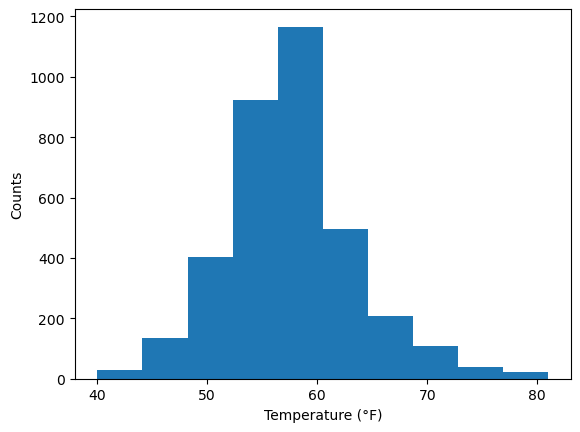

NormaltestResult(statistic=4.928882758182112, pvalue=0.0850563433547794)


In [5]:
# Characterize the data set using matplotlib and stats.normaltest
plt.hist(temperatures)
plt.xlabel('Temperature (°F)')
plt.ylabel('Counts')
plt.show()
print(st.normaltest(temperatures.sample(50)))

In [6]:
# Run the normality test on the whole temperatures DataFrame.
print(st.normaltest(temperatures.sample(3529)))

NormaltestResult(statistic=202.53753937770182, pvalue=1.0460010849581777e-44)


***What Is Normally Distributed Data?***
* Measurements in a dataset are obtained independent of one another.
* The distribution of data follows a bell curve shape.

![normal-distribution](../Images/normal-distribution-1.png)
* We can quantitatively test if a dataset is normal using **scipy.stats.normaltest()**

**What are variance and standard deviation?**
* ***Variance*** is the measurement of how far each value is away from the mean of the dataset.
* ***Standard deviation*** is the square root of variance.
* In Python, both `variance` and `standard deviation` are calculated using the NumPy module.

In [7]:
# Demonstrate calculating the variance and standard deviation using the different modules
var_numpy = np.var(temperatures,ddof = 0)
print(f"The population variance using the NumPy module is {var_numpy}")

sd_numpy = np.std(temperatures,ddof = 0)
print(f"The population standard deviation using the NumPy module is {sd_numpy}")

The population variance using the NumPy module is 32.33077618382964
The population standard deviation using the NumPy module is 5.686015844493369


When we have a dataset that is normally distributed, we can use the **68-95-99.7** rule to characterize the data.
* The **68-95-99.7** rule states that roughly **68%** of all values in normally distributed data fall within one standard deviation of the mean (in either direction). Additionally, **95%** of the values fall within two standard deviations, and **99.7%** of the values fall within three standard deviations.

![68-95-99.7 Rule](../Images/68-95-99.7_rule.jpg)


In [8]:
# Calculate the 68-95-99.7 rule using the standard deviation
print(f"Roughly 68% of the data is between {round(mean_numpy-sd_numpy,3)} and {round(mean_numpy+sd_numpy,3)}")
print(f"Roughly 95% of the data is between {round(mean_numpy-2*sd_numpy,3)} and {round(mean_numpy+2*sd_numpy,3)}")
print(f"Roughly 99.7% of the data is between {round(mean_numpy-3*sd_numpy,3)} and {round(mean_numpy+3*sd_numpy,3)}")

Roughly 68% of the data is between 51.969 and 63.341
Roughly 95% of the data is between 46.283 and 69.027
Roughly 99.7% of the data is between 40.597 and 74.713


**What is a Z-Score?**
* a **z-score** (also called a standard score) gives you an idea of how far from the **mean** a data point is. But more technically it’s a measure of how many **standard deviations** `below` or `above` the population mean a raw score is. 

* To calculate a **z-score** in Python, we must use the `scipy.stats.zscore` function.

In [9]:
# Demonstrate calculating the z-scores using SciPy
z_scipy = st.zscore(temperatures)
print(f"The z-scores using the SciPy module are {z_scipy}")

The z-scores using the SciPy module are 0      -0.994570
1      -1.170440
2      -0.994570
3      -1.522181
4      -2.577401
          ...   
3524    0.412390
3525    0.236520
3526    0.060650
3527    0.060650
3528    0.060650
Name: HourlyDryBulbTemperature, Length: 3529, dtype: float64


# ==========================================

### 3.02 Instructor Do: Quantiles and Outliers in Python (10 min)

**What are quantiles, quartiles, and outliers?**
* **[Quantiles](https://en.wikipedia.org/wiki/Quantile)** divide data into well-defined regions based on a sorted dataset.
* **[Quartiles](https://en.wikipedia.org/wiki/Quartile)** are a specific type of quantile where a sorted dataset is split into four equal parts.
  * Q1: 25% of the data
  * Q2: 50% of the data
  * Q3: 75% of the data
  
![quartiles](../Images/Quartile_02.png)
* **[Outliers](https://www.mathsisfun.com/data/outliers.html)** are an extreme value in a dataset that can skew calculations and results.


In [10]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**How to Identify Potential Outliers?**
* **Qualitatively** Use box and whisker plots to visually identify potential outlier data points.

![outlier_boxplot_annot.png](../Images/outlier_boxplot_annot.png)
* **Quantitatively** Determine the outlier boundaries in a dataset using the **1.5  IQR** rule.
  * `IQR` is the interquartile range, or the range between the 1st and 3rd quartiles.
  * Anything **below** `Q1 – 1.5  IQR` could be an outlier.
  * Anything **above** `Q3 + 1.5  IQR` could be an outlier.


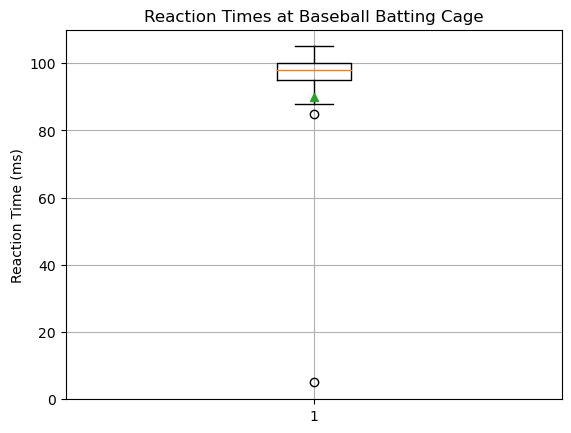

In [11]:
# Example outlier plot of reaction times
times = [96,98,100,105,85,88,95,100,101,102,97,98,5]
fig1, ax1 = plt.subplots()
ax1.set_title('Reaction Times at Baseball Batting Cage')
ax1.set_ylabel('Reaction Time (ms)')
ax1.boxplot(times, showmeans=True)
# ax1.boxplot(times)
plt.grid()
plt.show()

In [12]:
# We need to sort the data to determine which could be outliers
times.sort()
print(len(times), times)

13 [5, 85, 88, 95, 96, 97, 98, 98, 100, 100, 101, 102, 105]


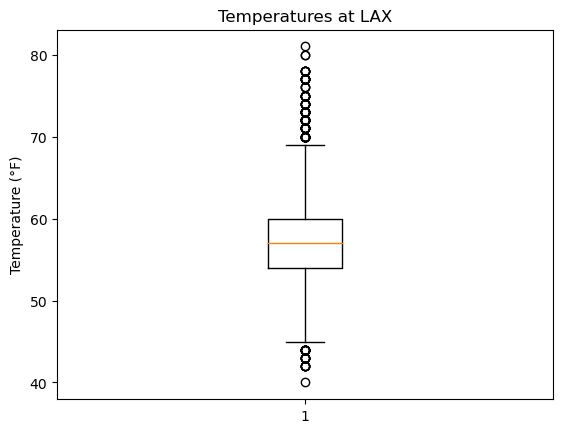

In [13]:
# The second example again looks at the LAX temperature data set and computes quantiles
temperature_df = pd.read_csv('02-Ins_Quartiles_and_Outliers/Resources/lax_temperature.csv')
temperatures = temperature_df['HourlyDryBulbTemperature']

fig1, ax1 = plt.subplots()
ax1.set_title('Temperatures at LAX')
ax1.set_ylabel('Temperature (°F)')
ax1.boxplot(temperatures)
plt.show()

**How to Identify Potential Outliers in Python?**
* **Qualitatively** Use Matplotlib’s pyplot.boxplot function to plot the box and whisker.
* **Quantitatively**
  * Use Pandas series.quantile function to calculate the quantile.
  * Calculate the outlier boundaries.

In [14]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = temperatures.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
iqr_1_5 = iqr * 1.5

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The interquartile * 1.5 range of temperatures is: {iqr_1_5}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - iqr_1_5
upper_bound = upperq + iqr_1_5
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 54.0
The upper quartile of temperatures is: 60.0
The interquartile range of temperatures is: 6.0
The interquartile * 1.5 range of temperatures is: 9.0
The the median of temperatures is: 57.0 
Values below 45.0 could be outliers.
Values above 69.0 could be outliers.


# ==========================================

### 3.03 Students Do: Summary Statistics in Python (15 min)

# Summary Statistics in Python

In this activity, you will be tasked with calculating a number of summary statistics using California housing data.

## Instructions

* Using Pandas, import the California housing dataset from the `Resources` folder.

* Determine the most appropriate measure of central tendency to describe the population, and then calculate this value.

* Use both data visualization and a quantitative measurement to find whether the age of houses in California is considered normally distributed using a small and large portion of the dataset.

* Examine the average occupancy of housing in California, and determine if there are any potential outliers in the dataset.

* If there are potential outliers in the average occupancy, find the minimum and maximum of the median housing prices across the outliers.

## Bonus

Plot the latitude and longitude of the California housing data using Matplotlib, and color the data points using the median income of the block. Does any location seem to be an outlier?

## References

U.S. Department of Commerce Bureau of the Census. (1990) 1990 Census of Housing General Housing Statistics: California. [https://www2.census.gov/library/publications/decennial/1990/ch-1/ch-1-6.pdf](https://www2.census.gov/library/publications/decennial/1990/ch-1/ch-1-6.pdf)

- - -

In [15]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [16]:
# Read in the california housing data set
california_data = pd.read_csv('03-Stu_Summary_Stats_Python/Resources/California_Housing.csv')
california_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,5.2742,17.0,8.908654,1.884615,351.0,1.687500,32.98,-117.27
1,1.8438,52.0,3.069847,1.044293,2382.0,4.057922,34.07,-118.26
2,7.0691,13.0,6.689697,1.009697,2444.0,2.962424,37.57,-121.87
3,5.4719,38.0,5.890080,0.957105,1228.0,3.292225,37.52,-122.28
4,4.0156,35.0,6.195312,1.171875,669.0,5.226562,33.93,-117.41


In [17]:
# Get the information on the DataFrame
YOUR_CODE_HERE

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      3000 non-null   float64
 1   HouseAge    3000 non-null   float64
 2   AveRooms    3000 non-null   float64
 3   AveBedrms   3000 non-null   float64
 4   Population  3000 non-null   float64
 5   AveOccup    3000 non-null   float64
 6   Latitude    3000 non-null   float64
 7   Longitude   3000 non-null   float64
dtypes: float64(8)
memory usage: 187.6 KB


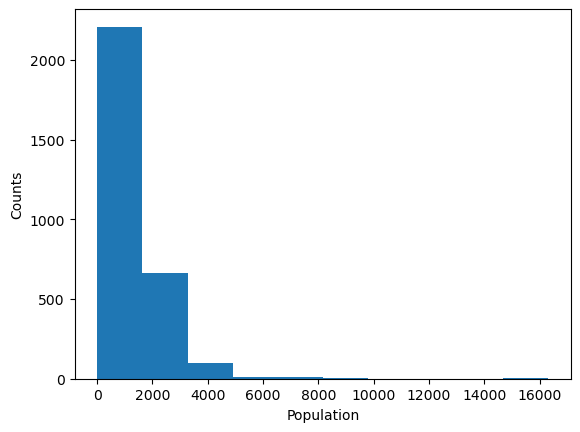

1387.9633333333334
1152.5
0    1128.0
Name: Population, dtype: float64


In [18]:
# Determine which measure of central tendency is most appropriate to describe the Population
plt.hist(YOUR_CODE_HERE)
plt.xlabel(YOUR_CODE_HERE)
plt.ylabel(YOUR_CODE_HERE)
plt.show()
print(YOUR_CODE_HERE.mean())
print(YOUR_CODE_HERE.median())
print(YOUR_CODE_HERE.mode())

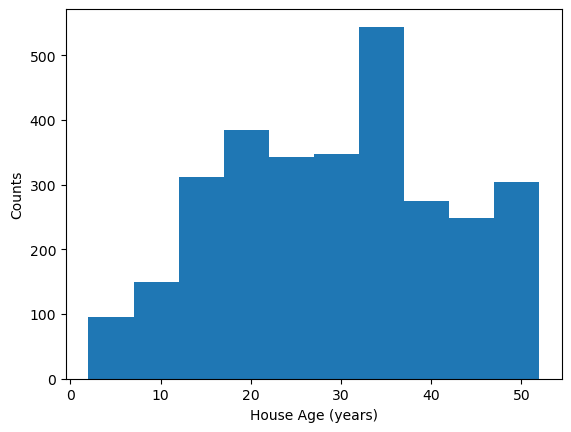

NormaltestResult(statistic=15.011567765187898, pvalue=0.0005498946285241551)
NormaltestResult(statistic=186.7079687666926, pvalue=2.8633848224896876e-41)


In [20]:
# Determine if the house age in California is normally distributed using a small and large sample size. 
plt.hist(YOUR_CODE_HERE)
plt.xlabel(YOUR_CODE_HERE)
plt.ylabel(YOUR_CODE_HERE)
plt.show()
print(YOUR_CODE_HERE)
print(YOUR_CODE_HERE)

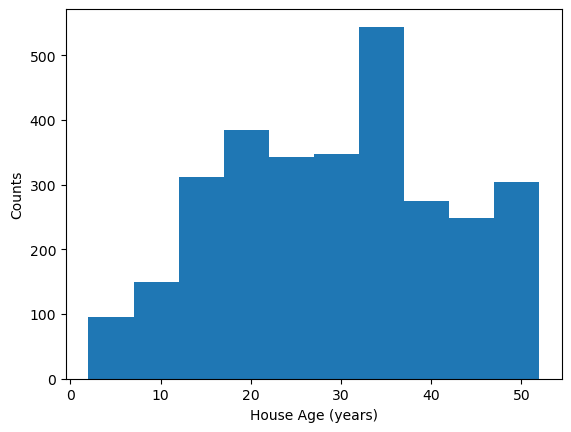

NormaltestResult(statistic=18.51633564072501, pvalue=9.532982660406625e-05)
29.108666666666668
30.0
0    52.0
Name: HouseAge, dtype: float64


In [21]:
# Determine if the house age in California is normally distributed
plt.hist(YOUR_CODE_HERE)
plt.xlabel(YOUR_CODE_HERE)
plt.ylabel(YOUR_CODE_HERE)
plt.show()
print(YOUR_CODE_HERE)
print(YOUR_CODE_HERE.mean())
print(YOUR_CODE_HERE.median())
print(YOUR_CODE_HERE.mode())

In [22]:
# Determine if there are any potential outliers in the average occupancy in California
quartiles = YOUR_CODE_HERE
lowerq = YOUR_CODE_HERE
upperq = YOUR_CODE_HERE
iqr = YOUR_CODE_HERE

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = YOUR_CODE_HERE
upper_bound = YOUR_CODE_HERE
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_occupancy = YOUR_CODE_HERE
outlier_occupancy

The lower quartile of occupancy is: 2.4250909806040477
The upper quartile of occupancy is: 3.297459274342836
The interquartile range of occupancy is: 0.8723682937387882
The the median of occupancy is: 2.81970199317512 
Values below 1.1165385399958654 could be outliers.
Values above 4.606011714951018 could be outliers.


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
4,4.0156,35.0,6.195312,1.171875,669.0,5.226562,33.93,-117.41
42,3.6429,26.0,5.836111,1.083333,2171.0,6.030556,38.57,-122.44
72,2.7759,30.0,4.167619,1.059048,2727.0,5.194286,33.83,-118.08
143,3.0509,30.0,5.598131,1.172897,1019.0,4.761682,33.94,-117.40
168,2.6300,29.0,3.496212,1.003788,2576.0,4.878788,33.97,-118.14
...,...,...,...,...,...,...,...,...
2793,2.5556,11.0,5.825112,1.255605,1158.0,5.192825,34.96,-120.45
2849,9.8892,40.0,8.244019,0.995215,976.0,4.669856,37.46,-122.20
2907,4.8750,5.0,7.101721,1.176056,7694.0,6.020344,34.69,-118.20
2919,1.6150,42.0,4.824000,1.216000,1167.0,4.668000,33.96,-118.28


In [23]:
# With the potential outliers, what is the lowest and highest median income (in $1000s) observed?
print(f"The minimum median income of the potential outliers is {YOUR_CODE_HERE.min()}")
print(f"The maximum median income of the potential outliers is {YOUR_CODE_HERE.max()}")

The minimum median income of the potential outliers is 0.716
The maximum median income of the potential outliers is 15.0001


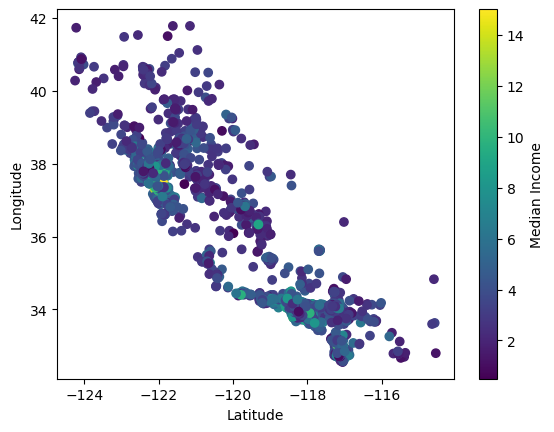

In [24]:
# Bonus - plot the latitude and longitude of the California housing data using Matplotlib, color the data points using the median income of the block.
plt.scatter(YOUR_CODE_HERE)
clb = plt.colorbar()
plt.xlabel(YOUR_CODE_HERE)
plt.ylabel(YOUR_CODE_HERE)
clb.set_label(YOUR_CODE_HERE)
plt.show()

# ==========================================

### 3.04 Instructor Do: Sample, Population, and SEM (15 min)

**Population Dataset vs. Sample Dataset**
* **Population Dataset**
  * Dataset containing all possible elements of an experiment or study.
  * In statistics, `population` does not mean `people`.
  * Any `complete set` of data is a `population dataset`.

* **Sample Dataset**
  * A `subset` of `population dataset`.
  * A `sample dataset` can be selected **randomly** from the `population dataset` or selected with **bias**.

* **Standard Error of the Mean (SEM)**: Simply `standard error`, indicates how different the population mean is likely to be from a sample mean.
    * To estimate how well a sample is representative of the total **population**, we calculate the **standard error** (**standard error of the mean**, or **SEM**) of the **sample**.
    * [scipy.stats.sem](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html)
    The **standard error of the mean (SEM)** can be expressed as ![Standard_error_formula.png](../Images/Standard_error_formula.png)
    * **σ** is the **standard deviation** of the population.
    * **n** is the **size** (number of observations) of the sample.

# Instructor Demo

## Resources

U.S. Department of Energy Office of Energy Efficiency and Renewable Energy. (2019). Fuel Economy Guide Model Year 2019.[https://www.fueleconomy.gov/feg/download.shtml](https://www.fueleconomy.gov/feg/download.shtml)

- - -

In [25]:
# Dependencies
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem

# Set the seed so our data is reproducible
random.seed(42)

In [26]:
# Sample versus population example fuel economy
fuel_economy = pd.read_csv('04-Ins_Standard_Error/Resources/2019_fuel_economy.csv')

# First overview the data set - how many factors, etc.
print(fuel_economy.head())

          Type  Combined_MPG                           Make_Model
0  Two Seaters       21.0000                            Acura_NSX
1  Two Seaters       27.9406                        ALFA ROMEO_4C
2  Two Seaters       20.9455  Aston Martin Lagonda Ltd_Vantage V8
3  Two Seaters       25.9952             Audi_TT Roadster quattro
4  Two Seaters       27.6300                     BMW_Z4 sDrive30i


The mean MPG of all vehicles is: 23.33
The standard deviation of all vehicle's MPG is: 5.94


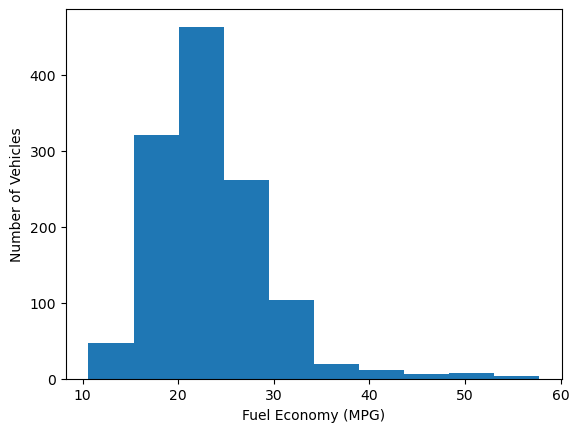

In [27]:
# Calculate the summary statistics and plot the histogram of the entire population data
print(f"The mean MPG of all vehicles is: {round(fuel_economy['Combined_MPG'].mean(),2)}")
print(f"The standard deviation of all vehicle's MPG is: {round(fuel_economy['Combined_MPG'].std(),2)}")
plt.hist(fuel_economy['Combined_MPG'])
plt.xlabel("Fuel Economy (MPG)")
plt.ylabel("Number of Vehicles")
plt.show()

The mean MPG of all vehicles is: 18.48
The standard deviation of all vehicle's MPG is: 2.41


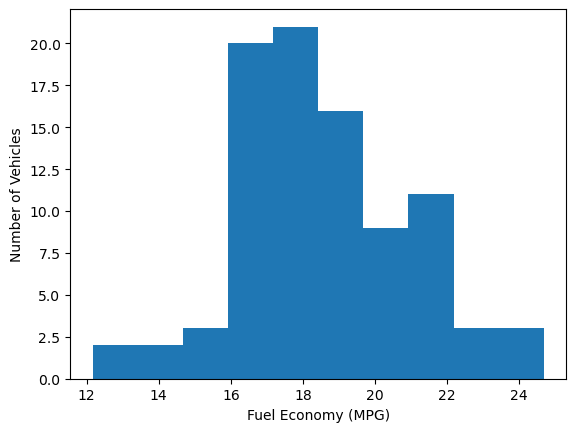

In [28]:
# Calculate the summary statistics and plot the histogram of the sample data using iloc
subset = fuel_economy.iloc[range(766,856)]
print(f"The mean MPG of all vehicles is: {round(subset['Combined_MPG'].mean(),2)}")
print(f"The standard deviation of all vehicle's MPG is: {round(subset['Combined_MPG'].std(),2)}")
plt.hist(subset['Combined_MPG'])
plt.xlabel("Fuel Economy (MPG)")
plt.ylabel("Number of Vehicles")
plt.show()

The mean MPG of all vehicles is: 23.02
The standard deviation of all vehicle's MPG is: 5.5


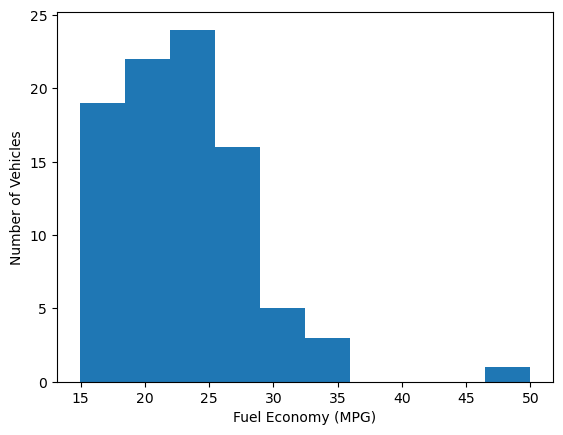

In [29]:
# Calculate the summary statistics and plot the histogram of the sample data using random sampling
subset = fuel_economy.sample(90)
print(f"The mean MPG of all vehicles is: {round(subset['Combined_MPG'].mean(),2)}")
print(f"The standard deviation of all vehicle's MPG is: {round(subset['Combined_MPG'].std(),2)}")
plt.hist(subset['Combined_MPG'])
plt.xlabel("Fuel Economy (MPG)")
plt.ylabel("Number of Vehicles")
plt.show()

In [30]:
# Generate a new 30 vehicle sample and calculate the SEM of the sample
sample = fuel_economy.sample(30)
print(f"The SEM value for the sample fuel economy data is {sem(sample['Combined_MPG'])}")

The SEM value for the sample fuel economy data is 0.9489917738640761


In [31]:
# Create a sample set of 10, each with 30 vehicles
vehicle_sample_set = [fuel_economy.sample(30) for x in range(0,10)]

In [32]:
# Generate the plot data for each sample 
means = [sample['Combined_MPG'].mean() for sample in vehicle_sample_set]
standard_errors = [sem(sample['Combined_MPG']) for sample in vehicle_sample_set]
x_axis = np.arange(0, len(vehicle_sample_set), 1) + 1

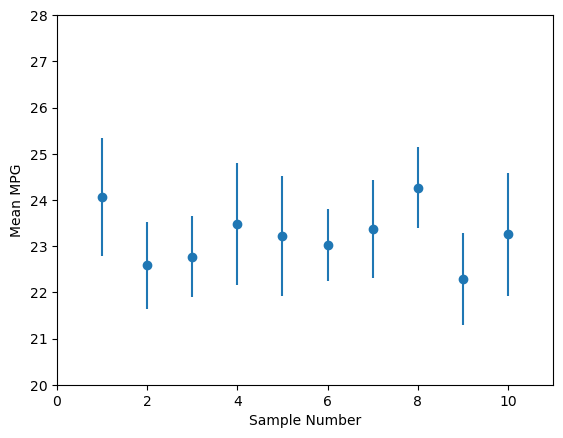

In [33]:
# Setting up the plot
fig, ax = plt.subplots()
ax.errorbar(x_axis, means, standard_errors, fmt="o")
ax.set_xlim(0, len(vehicle_sample_set) + 1)
ax.set_ylim(20,28)
ax.set_xlabel("Sample Number")
ax.set_ylabel("Mean MPG")
plt.show()

# ==========================================

### 3.05 Students Do: SEM and Error Bars (10 min)

# SEM and Error Bars

In this activity, you will work with a partner to characterize sample data from a California housing dataset. Make sure to compare your calculated values as you progress through the activity.

## Instructions

Work with a partner on this activity. Be sure to compare your calculated values as you progress through the activity.

* Open the `samples.ipynb` in the activity folder.
    * Execute the starter code to import the California housing dataset from Scikit-learn.
    * Create a sample set of median housing prices using Pandas. Set the sample size to 20.
    * Calculate the means and standard errors for each sample.
    * Create a plot displaying the means for each sample, with the standard error as error bars.
    * Calculate the range of SEM values across the sample set.
    * Determine which sample's mean is closest to the population mean.
    * Compare this sample's mean to the population's mean.
    * Rerun your sampling code a few times to generate new sample sets. Try changing the sample size and then rerunning the sampling code.

* Discuss with your partner what changes you observe when sample size changes.

## References

[Scikit-learn’s California housing dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html)

- - -

In [34]:
# %matplotlib notebook

In [35]:
# Import dependencies
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from scipy.stats import sem

In [36]:
# Import the California housing data set and get description
california_dataset = fetch_california_housing()

print(california_dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [37]:
# Read California housing data into a Pandas dataframe
housing_data = pd.DataFrame(data=california_dataset.data,columns=california_dataset.feature_names)
housing_data['MEDV'] = california_dataset.target
housing_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [38]:
# Create a bunch of samples, each with sample size of 20
nsamples = 25
div = 20
samples = YOUR_CODE_HERE

In [39]:
# Calculate means
means = YOUR_CODE_HERE
# Calculate standard error on means
sems = YOUR_CODE_HERE

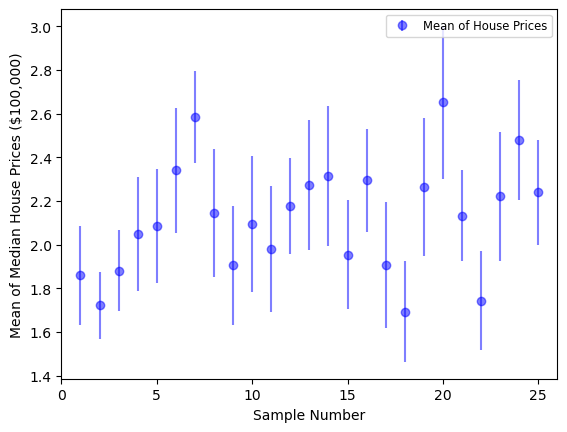

In [40]:
# Plot sample means with error bars
fig, ax = plt.subplots()
ax.errorbar(YOUR_CODE_HERE)
ax.set_xlim(YOUR_CODE_HERE)
ax.set_xlabel(YOUR_CODE_HERE)
ax.set_ylabel(YOUR_CODE_HERE)
plt.legend(YOUR_CODE_HERE)
plt.show()

In [41]:
# Calculate the range of SEM values
print(f"The range of SEM values in the sample set is {max(sems)-min(sems)}")

The range of SEM values in the sample set is 0.196560519171858


In [42]:
# Determine which sample's mean is closest to the population mean
print(f"The smallest SEM observed was {min(sems)}")
samp_index = sems.index(min(sems))
print(f"The sample with the smallest SEM is sample {samp_index+1}")

The smallest SEM observed was 0.15407617519641995
The sample with the smallest SEM is sample 2


In [43]:
# Compare to the population mean
print(f"The mean of the sample 5 is {samples[samp_index]['MEDV'].mean()}")
print(f"The mean of the population data set is {housing_data['MEDV'].mean()}")

The mean of the sample 5 is 1.7217499999999997
The mean of the population data set is 2.0685581690891843


# ==========================================

## Break (0:30)

# ==========================================

### 3.06 Instructor Do: Correlation Conundrum (15 min)

**Correlation** describes the question, `Is there a relationship between A and B?`

![correlations.png](../Images/correlations.png)


**Pearson's Correlation Coefficient**
In statistics, we quantify correlation using **Pearson’s r**.
* Pearson’s correlation coefficient describes the variability between two factors, denoted by the variable r.
* Pearson’s r is –1 ≤ r ≤ 1
  * –1 indicates perfect negative correlation.
  * 1 indicates perfect positive correlation.
  * 0 indicates no correlation.
* Real-world data is never perfect.

# Instructor Demo

## References

The World Data Bank. (2021) World Development Indicators. [https://datacatalog.worldbank.org/search/dataset/0037712/World-Development-Indicators](https://datacatalog.worldbank.org/search/dataset/0037712/World-Development-Indicators), reduced in pandas.

- - -

In [44]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [45]:
# Import the WDI dataset, drop missing data
wdi_data = pd.read_csv('06-Ins_Correlation_Conundrum/Resources/WDI_2018.csv')
wdi_data = wdi_data.dropna()
wdi_data.head()

,Country Name,Adjusted net national income per capita (current US$),Population (in thousands) total,Population Median Age,Percent Population over 65,Domestic general government health expenditure (% of general government expenditure),"Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",People using at least basic drinking water services (% of population),Mobile cellular subscriptions (per 100 people),Mobile cellular subscriptions,"Immunization, measles (% of children ages 12-23 months)",Military expenditure (% of GDP)
0,Afghanistan,473.319371,37171.922,18.9,2.584927,1.798056,66.026,63.047,0.21,69.601931,59.120848,21976355.0,64.0,1.006746
1,Albania,4326.330596,2866.376,32.9,13.744742,9.709609,80.167,76.816,7.17,94.436391,94.176998,2714878.0,94.0,1.161266
2,Algeria,3219.975007,42228.415,28.1,6.362495,10.734436,77.938,75.494,0.95,94.037413,111.664792,47154264.0,80.0,5.467824
4,Angola,2000.546817,30809.787,15.9,2.216374,5.426737,63.666,58.064,6.94,56.591749,43.130519,13288421.0,50.0,1.871776
7,Armenia,3685.765957,2951.741,35.1,11.253833,5.269859,78.354,71.215,5.55,99.951924,121.259018,3579257.0,95.0,4.119886


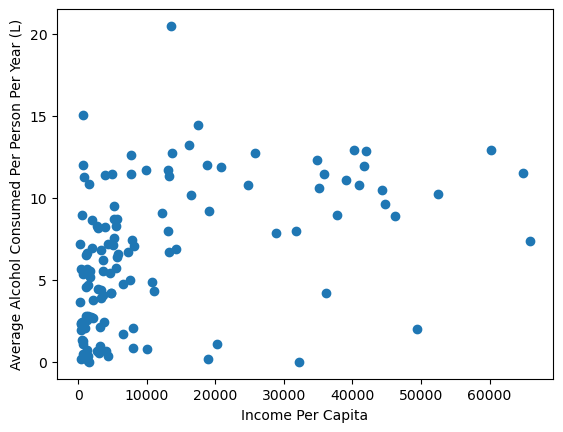

In [46]:
# For the first example, determine which pairs of factors are correlated. 
plt.scatter(wdi_data.iloc[:,1],wdi_data.iloc[:,8])
plt.xlabel('Income Per Capita')
plt.ylabel('Average Alcohol Consumed Per Person Per Year (L)')
plt.show()

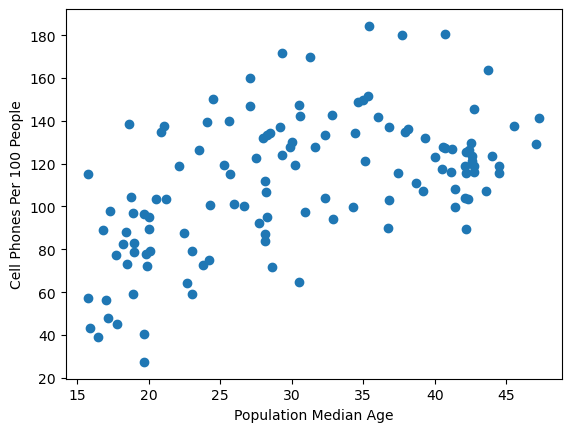

In [47]:
plt.scatter(wdi_data.iloc[:,3],wdi_data.iloc[:,10])
plt.xlabel('Population Median Age')
plt.ylabel('Cell Phones Per 100 People')
plt.show()

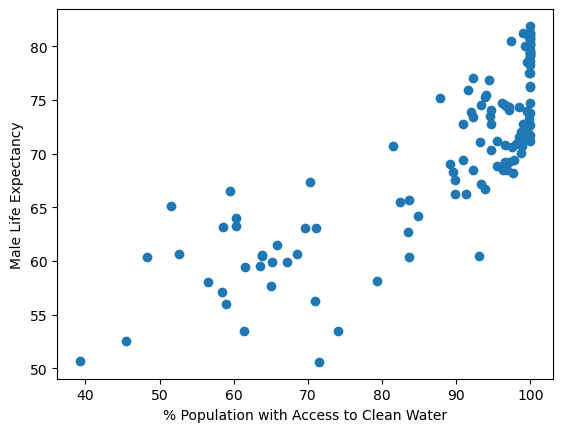

In [48]:
plt.scatter(wdi_data.iloc[:,9],wdi_data.iloc[:,7])
plt.xlabel('% Population with Access to Clean Water')
plt.ylabel('Male Life Expectancy')
plt.show()

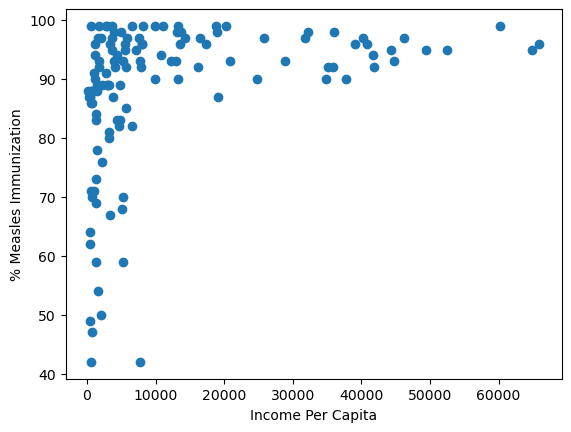

In [49]:
plt.scatter(wdi_data.iloc[:,1],wdi_data.iloc[:,12])
plt.xlabel('Income Per Capita')
plt.ylabel('% Measles Immunization')
plt.show()

In [50]:
# The next example will compute the Pearson correlation coefficient between "Income per Capita" and "Average Alcohol Consumed"
income = wdi_data.iloc[:,1]
alcohol = wdi_data.iloc[:,8]
correlation = st.pearsonr(income,alcohol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.42


The correlation between both factors is 0.42


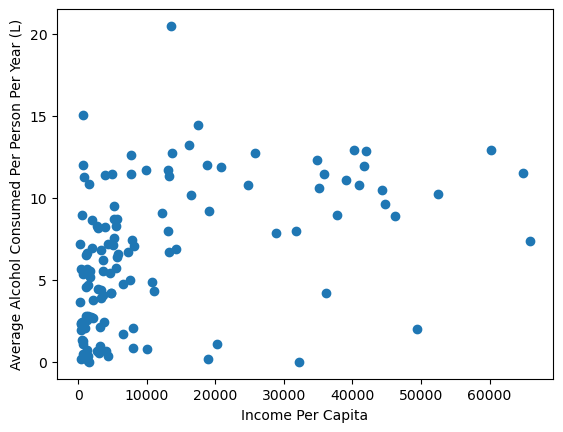

In [51]:
# Compare the calcualted Pearson's r to the plots
plt.scatter(income,alcohol)
plt.xlabel('Income Per Capita')
plt.ylabel('Average Alcohol Consumed Per Person Per Year (L)')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.53


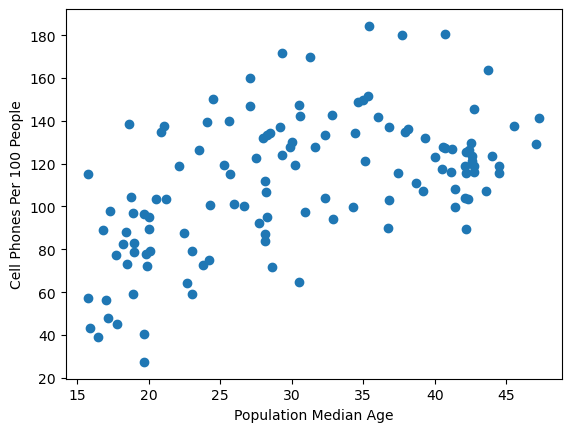

In [52]:
age = wdi_data.iloc[:,3]
cell_phones = wdi_data.iloc[:,10]
correlation = st.pearsonr(age,cell_phones)
plt.scatter(age,cell_phones)
plt.xlabel('Population Median Age')
plt.ylabel('Cell Phones Per 100 People')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.83


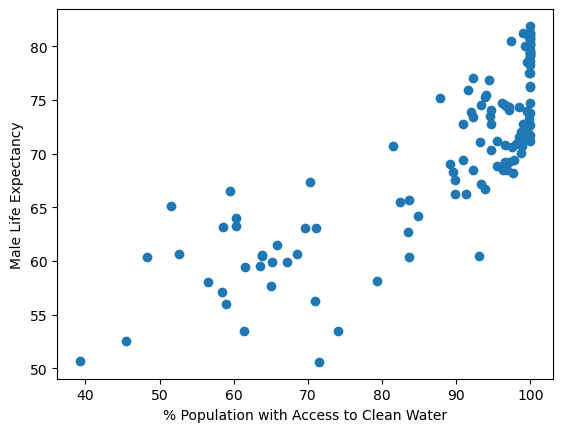

In [53]:
water = wdi_data.iloc[:,9]
life = wdi_data.iloc[:,7]
correlation = st.pearsonr(water,life)
plt.scatter(water,life)
plt.xlabel('% Population with Access to Clean Water')
plt.ylabel('Male Life Expectancy')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.34


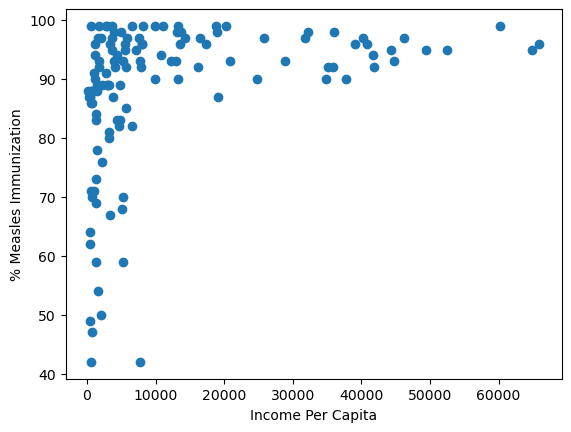

In [54]:
income = wdi_data.iloc[:,1]
measles = wdi_data.iloc[:,12]
correlation = st.pearsonr(income,measles)
plt.scatter(income,measles)
plt.xlabel('Income Per Capita')
plt.ylabel('% Measles Immunization')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

# ==========================================

### 3.07 Students Do: Correlation Conquerors (10 min)

# Correlation Conquerors

In this activity, you’ll have an opportunity to use SciPy to compare factors across Scikit-learn's wine recognition dataset.

The wine recognition dataset includes "the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators." Measurements of different constituents are taken for three types of wine.

**Note:** This dataset contains a typo ("flavanoid") that we have retained in the code to minimize confusion.

## Instructions

* Open [correlations.ipynb](Unsolved/correlations.ipynb) in the activity folder.

* Execute the starter code to import the wine recognition dataset from Scikit-learn.

* Using the dataset, plot the factors flavonoids and malic acid against each other on a scatter plot. Is this relationship positively correlated, negatively correlated, or not correlated? How strong is the correlation?

* Calculate the Pearson's correlation coefficient for  malic acid versus flavonoids. Compare the correlation coefficient to the following strength of correlation table. Was your prediction correct?

    ![correlation strength table.](../Images/correlation_table.png)

* Plot the factors color intensity versus alcohol on a scatter plot. Is this relationship positively correlated, negatively correlated, or not correlated? How strong is the correlation?

* Calculate the Pearson's correlation coefficient for alcohol versus color intensity. Compare the correlation coefficient to the Strength of Correlation table. Was your prediction correct?

## Bonus

* Review the [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/) to find how to generate a correlation matrix. This matrix will contain the Pearson correlation coefficient for all pairs of factors in the DataFrame.

* Generate the correlation matrix, and try to find the pair of factors with the strongest positive and negative correlations.

## References

[Scikit-learn’s wine dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) originally sourced from https://archive.ics.uci.edu/ml/datasets/wine

- - -

In [55]:
# Dependencies
import pandas as pd
import sklearn.datasets as dta
import scipy.stats as st
import matplotlib.pyplot as plt

In [56]:
# Read in the wine recognition data set from sklearn and load into Pandas
data = dta.load_wine()
wine_data = pd.DataFrame(data.data,columns=data.feature_names)
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

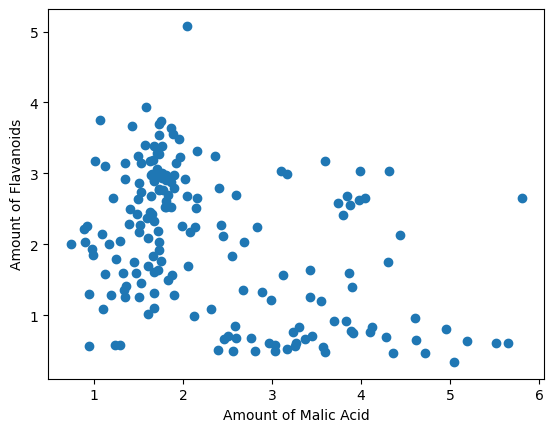

In [57]:
# Plot flavanoids versus malic_acid on a scatterplot
flavanoids = YOUR_CODE_HERE
malic_acid = YOUR_CODE_HERE
plt.scatter(malic_acid,flavanoids)
plt.xlabel(YOUR_CODE_HERE)
plt.ylabel(YOUR_CODE_HERE)
plt.show()

In [58]:
# Calculate the correlation coefficient between malic_acid and flavanoids
print(f"The correlation coefficient between malic acid and flavanoids is {round(st.pearsonr(malic_acid,flavanoids)[0],2)}")

The correlation coefficient between malic acid and flavanoids is -0.41


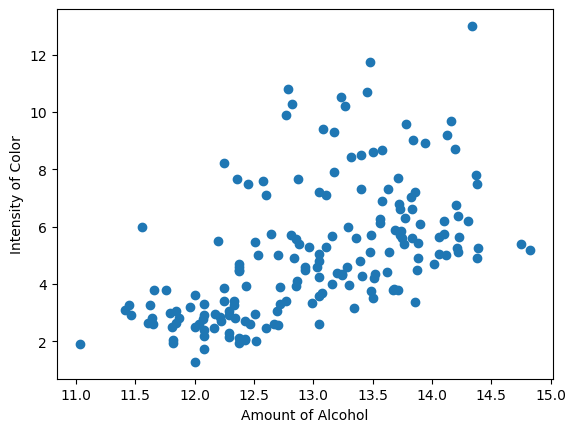

In [59]:
# Plot colour_intensity versus alcohol on a scatterplot
color_intensity = YOUR_CODE_HERE
alcohol = YOUR_CODE_HERE
plt.scatter(alcohol,color_intensity)
plt.xlabel(YOUR_CODE_HERE)
plt.ylabel(YOUR_CODE_HERE)
plt.show()

In [60]:
# Calculate the correlation coefficient between alcohol and color_intensity
print(f"The correlation coefficient between alcohol and color intensity is {round(st.pearsonr(alcohol,color_intensity)[0],2)}")

The correlation coefficient between alcohol and color intensity is 0.55


In [61]:
# BONUS: Generate the correlation matrix and find the strongest positive and negative correlations
wine_corr = YOUR_CODE_HERE
wine_corr.unstack().sort_values()

malic_acid                    hue                            -0.561296
hue                           malic_acid                     -0.561296
nonflavanoid_phenols          flavanoids                     -0.537900
flavanoids                    nonflavanoid_phenols           -0.537900
hue                           color_intensity                -0.521813
                                                                ...   
alcalinity_of_ash             alcalinity_of_ash               1.000000
ash                           ash                             1.000000
malic_acid                    malic_acid                      1.000000
od280/od315_of_diluted_wines  od280/od315_of_diluted_wines    1.000000
proline                       proline                         1.000000
Length: 169, dtype: float64

# ==========================================

### 3.08 Instructor Do: Fits and Regression (15 min)

**Equation of a Straight Line**

* y = mx + b

* **m** is Slope or Gradient, **Slope** = Change in Y / Change in X |
* **Y Intercept** the value of **y** when **x** = 0

# Instructor Demo

## References

[Scikit-learn’s California housing dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html)

[Scikit-learn diabetes dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset) originally sourced from https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html - Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004) “Least Angle Regression,” Annals of Statistics (with discussion), 407-499. (https://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf)

- - -

In [62]:
# Import dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

# Compare different factors in the California housing dataset

In [63]:
# Read in the California housing dataset
california_dataset = datasets.fetch_california_housing()
housing_data = pd.DataFrame(data=california_dataset.data,columns=california_dataset.feature_names)
housing_data['MEDV'] = california_dataset.target

In [64]:
# Reduce the dataset to remove AveRooms outliers
housing_data_reduced = pd.DataFrame(housing_data.loc[housing_data['AveRooms']<10,:])

# Reduce the dataset to the San Diego Area (based on approx latitude & longitude area)
san_diego_housing = pd.DataFrame(housing_data_reduced.loc[((housing_data_reduced['Latitude']>32.664282) & 
                                                          (housing_data_reduced['Latitude']<32.980514) &
                                                          (housing_data_reduced['Longitude']>-117.300418) &
                                                          (housing_data_reduced['Longitude']<-117.01950)),:])

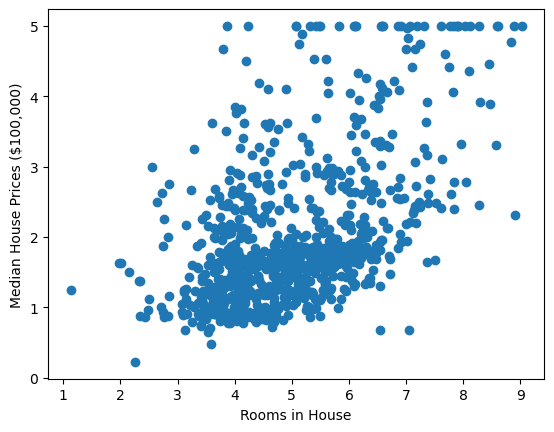

In [65]:
# Plot out rooms versus median house price
x_values = san_diego_housing['AveRooms']
y_values = san_diego_housing['MEDV']
plt.scatter(x_values,y_values)
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($100,000)')
plt.show()

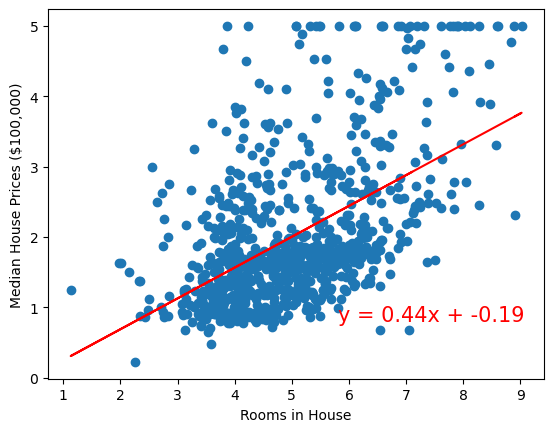

In [66]:
# Add the linear regression equation and line to plot
x_values = san_diego_housing['AveRooms']
y_values = san_diego_housing['MEDV']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($100,000)')
plt.show()

The r-squared is: 0.27748572828217377


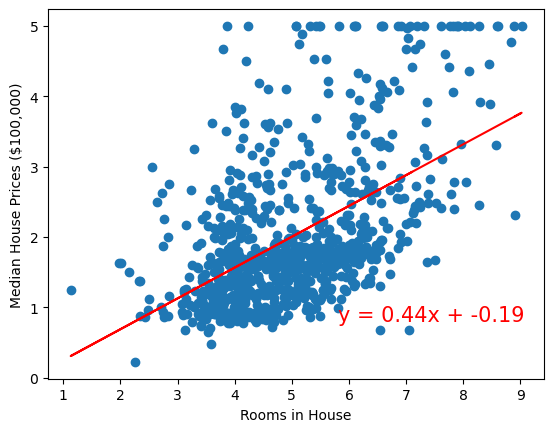

In [67]:
# Print out the r-squared value along with the plot.
x_values = san_diego_housing['AveRooms']
y_values = san_diego_housing['MEDV']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($100,000)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Compare linear relationships with the diabetes dataset

In [68]:
# Read in the diabetes dataset
diabetes_data = datasets.load_diabetes()
data = pd.DataFrame(diabetes_data.data,columns=diabetes_data.feature_names)
data['1Y_Disease_Progress'] = diabetes_data.target

The r-squared is: 0.19490798886682942


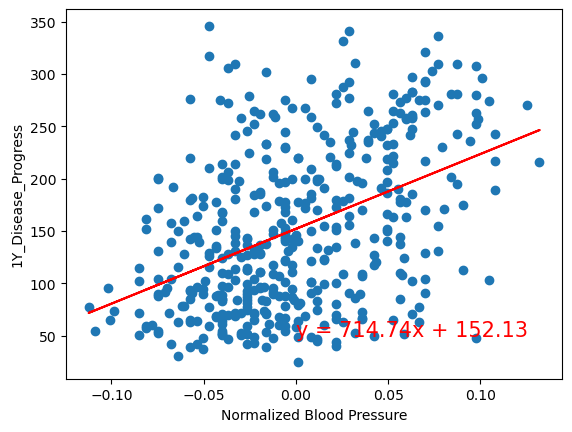

In [69]:
# Plot the different factors in a scatter plot
x_values = data['bp']
y_values = data['1Y_Disease_Progress']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Normalized Blood Pressure')
plt.ylabel('1Y_Disease_Progress')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# ==========================================

### 3.09 Students Do: Fits and Regression (15 min)

# Fits and Regression

This activity is an opportunity to use SciPy to fit data and Matplotlib to display the fit.

## Instructions
* Open the `vehicles.ipynb` file, and execute the starter code. This starter code will import the dependencies you will need as well as load the vehicle dataset.
* Generate a scatter plot with Matplotlib using the year as the independent (*x*) variable and the number of petrol-electric cars as the dependent (*y*) variable.
* Use `stats.linregress` to perform a linear regression with the year as the independent variable (*x*) and the number of petrol-electric cars as the dependent variable (*y*).
* Use the information returned by `stats.linregress` to create the equation of a line from the model.
* Calculate the predicted number of petrol-electric cars of the linear model using the year as the *x* values.
* Plot the linear model of year versus number of petrol-electric cars on top of your scatter plot.
  * Your scatter plot and line plot share the same axis.
  * To overlay plots in a notebook, the plots must be in the same code block.
* Repeat the process of generating a scatter plot, calculating the linear regression model, and plotting the regression line over the scatter plot for the following pairs of variables:
  * Year versus number of petrol cars.
  * Year versus number of diesel cars.

## Bonus
* Use `pyplot.subplots` from Matplotlib to create a new figure that displays all three pairs of variables on the same plot. For each pair of variables, there should be a scatter plot and a regression line.
  * All three plots share the same x-axis.
* Use the regression lines you created to predict what the number of petrol-electric, petrol, and diesel cars will be in 2024.

## Hint
* Review the documentation for [stats.linregress](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html).
* Recall that `stats.linregress` returns a slope, called *m*, and a *y* intercept, called *b*. These let you define a line for each fit simply by writing `y-values = m * x-values + b` for each linear regression you perform.

## References

Singapore Land Transport Authority. (2022). Annual Motor Vehicle Population by Type of Fuel Used. [https://data.gov.sg/dataset/annual-motor-vehicle-population-by-type-of-fuel-used](https://data.gov.sg/dataset/annual-motor-vehicle-population-by-type-of-fuel-used)

- - -

In [70]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

In [71]:
# Load vehicle data set into pandas
vehicle_data = pd.read_csv("09-Stu_Fits_and_Regression/Resources/singapore-motor-vehicle-population.csv")
vehicle_data.head()

,year,type,engine,number
0,2006,Cars,Petrol,471707
1,2006,Cars,Diesel,7
2,2006,Cars,Petrol-Electric,379
3,2006,Cars,Petrol-Electric (Plug-In),0
4,2006,Cars,Petrol-CNG,214


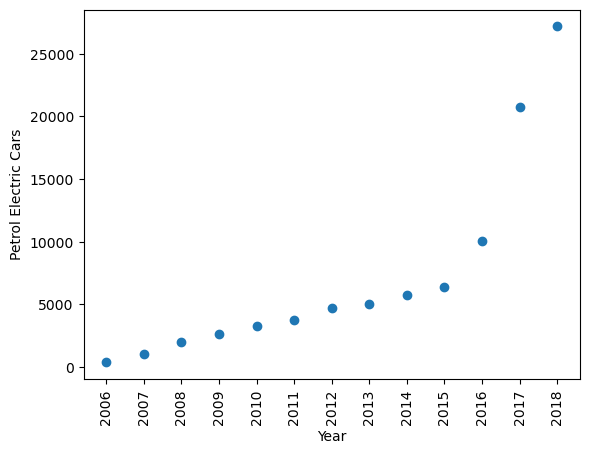

In [72]:
# Generate a scatter plot of year versus number of petrol-electric cars
year = YOUR_CODE_HERE
petrol_electric_cars = YOUR_CODE_HERE
plt.scatter(year,petrol_electric_cars)
plt.xticks(year, rotation=90)
plt.xlabel(YOUR_CODE_HERE)
plt.ylabel(YOUR_CODE_HERE)
plt.show()

In [73]:
# Perform a linear regression on year versus petrol-electric cars
pe_slope, pe_int, pe_r, pe_p, pe_std_err = YOUR_CODE_HERE

In [81]:
# Create equation of line to calculate predicted number of petrol-electric cars
pe_fit = YOUR_CODE_HERE
pe_fit

27515.538461538497

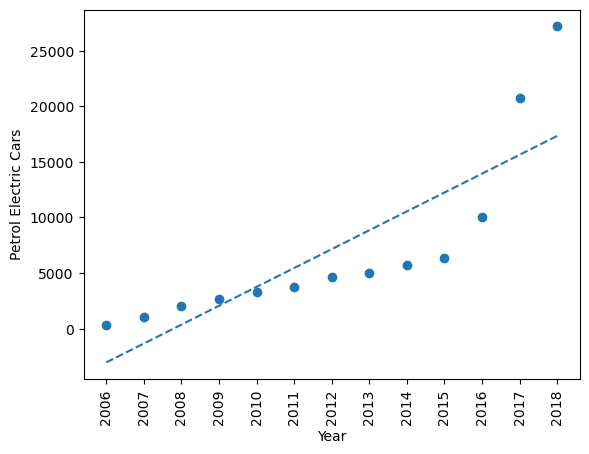

In [75]:
# Plot the linear model on top of scatter plot 
year = YOUR_CODE_HERE
petrol_electric_cars = YOUR_CODE_HERE
plt.scatter(year,petrol_electric_cars)
plt.plot(year,pe_fit,"--")
plt.xticks(year, rotation=90)
plt.xlabel(YOUR_CODE_HERE)
plt.ylabel(YOUR_CODE_HERE)
plt.show()

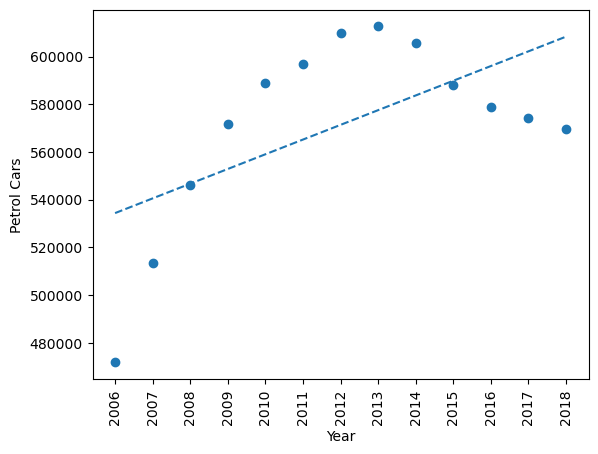

In [76]:
# Repeat plotting scatter and linear model for year versus petrol cars
petrol_cars = YOUR_CODE_HERE
p_slope, p_int, p_r, p_p, p_std_err = YOUR_CODE_HERE
p_fit = p_slope * year + p_int
plt.scatter(year,petrol_cars)
plt.plot(year,p_fit,"--")
plt.xticks(year, rotation=90)
plt.xlabel('Year')
plt.ylabel('Petrol Cars')
plt.show()

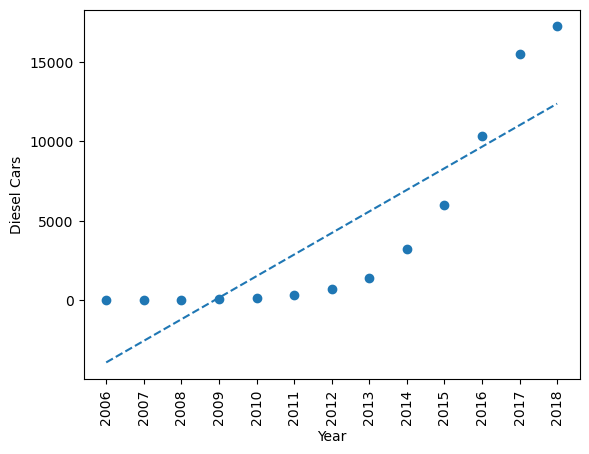

In [77]:
# Repeat plotting scatter and linear model for year versus electric cars
diesel_cars = YOUR_CODE_HERE
d_slope, d_int, d_r, d_p, d_std_err = stats.linregress(year, diesel_cars)
d_fit = d_slope * year + d_int
plt.scatter(year,diesel_cars)
plt.plot(year,d_fit,"--")
plt.xticks(YOUR_CODE_HERE)
plt.xlabel(YOUR_CODE_HERE)
plt.ylabel(YOUR_CODE_HERE)
plt.show()

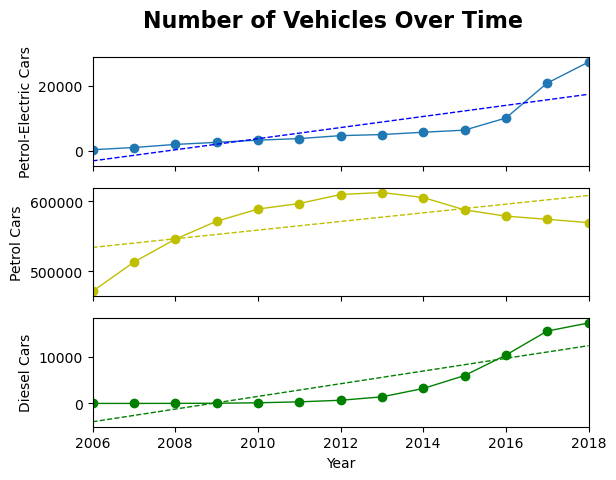

In [78]:
# Generate a facet plot of all 3 figures
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle("Number of Vehicles Over Time", fontsize=16, fontweight="bold")

ax1.set_xlim(min(year), max(year))
ax1.plot(year, petrol_electric_cars, linewidth=1, marker="o")
ax1.plot(year, pe_fit, "b--", linewidth=1)
ax1.set_ylabel("Petrol-Electric Cars")

ax2.plot(year, petrol_cars, linewidth=1, marker="o", color="y")
ax2.plot(year, p_fit, "y--", linewidth=1)
ax2.set_ylabel("Petrol Cars")

ax3.plot(year, diesel_cars, linewidth=1, marker="o", color="g")
ax3.plot(year, d_fit, "g--", linewidth=1)
ax3.set_ylabel("Diesel Cars")
ax3.set_xlabel("Year")

plt.show()

In [79]:
# Calculate the number of cars for 2024
year = 2024
print(f"The number of petrol-electic cars in 2024 will be {round(pe_slope * year + pe_int,0)}.")
print(f"The number of petrol cars in 2024 will be {round(p_slope * year + p_int,0)}.")
print(f"The number of diesel cars in 2024 will be {round(d_slope * year + d_int,0)}.")

The number of petrol-electic cars in 2024 will be 27516.0.
The number of petrol cars in 2024 will be 645370.0.
The number of diesel cars in 2024 will be 20541.0.


# ==========================================

### Rating Class Objectives

* rate your understanding using 1-5 method in each objective

In [ ]:
title = "05-Matplotlib - Day 3 - Introduction to Statistics"
objectives = [
    "Calculate summary statistics such as mean, median, mode, variance and standard deviation using Python",
    "Plot, characterize, and quantify a normally distributed dataset using Python",
    "Qualitatively and quantitatively identify potential outliers in a dataset",
    "Differentiate between a sample and a population in regards to a dataset",
    "Define and quantify correlation between two factors",
    "Calculate and plot a linear regression in Python",
]
rating = []
total = 0
for i in range(len(objectives)):
    rate = input(objectives[i]+"? ")
    total += int(rate)
    rating.append(objectives[i] + ". (" + rate + "/5)")
print("="*96)
print(f"Self Evaluation for: {title}")
print("-"*24)
for i in rating:
    print(i)
print("-"*64)
print("Average: " + str(total/len(objectives)))